<a href="https://colab.research.google.com/github/RaoUmair98/Deep-Learning/blob/main/Detecting_Glaucoma_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/glaucoma (1).csv')
print(df.head())

  Filename  ExpCDR Eye Set  Glaucoma
0  001.jpg  0.7097  OD   A         0
1  002.jpg  0.6953  OS   A         0
2  003.jpg  0.9629  OS   A         0
3  004.jpg  0.7246  OD   A         0
4  005.jpg  0.6138  OS   A         0


In [ ]:
df.shape

(650, 5)

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Filename,001.jpg,002.jpg,003.jpg,004.jpg,005.jpg,006.jpg,007.jpg,008.jpg,009.jpg,010.jpg
ExpCDR,0.7097,0.6953,0.9629,0.7246,0.6138,0.6451,0.5255,0.4974,0.5273,0.4451
Eye,OD,OS,OS,OD,OS,OD,OS,OD,OD,OD
Set,A,A,A,A,A,B,A,B,B,B
Glaucoma,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['Glaucoma'].value_counts()

0    482
1    168
Name: Glaucoma, dtype: int64

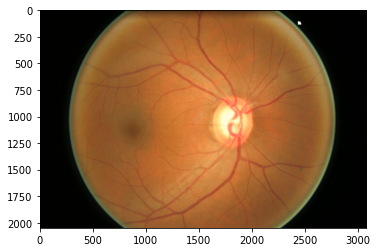

In [ ]:
plt.imshow(mpimg.imread('/content/drive/MyDrive/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg'))

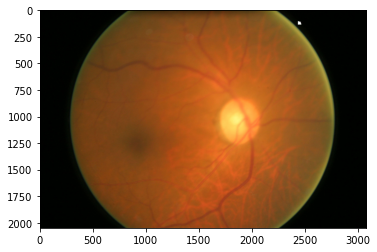

In [ ]:
plt.imshow(mpimg.imread('/content/drive/MyDrive/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/036.jpg'))

In [ ]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :
    
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            img = cv2.resize(img, (xdim,ydim)) 
            X.append(np.array(img)) 
            y.append(label)
            n=n+1
        print(n,' images lues')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect()
    return X,y, label, label_names

In [ ]:
X,y,Nombre_classes,Classes = lire_images('/content/drive/MyDrive/Fundus_Scanes_Sorted/Train', 300, 200)

Glaucoma_Negative
386  images lues
Glaucoma_Positive
134  images lues


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
X.shape

(520, 200, 300, 3)

In [ ]:
X = X / 255

In [ ]:
X

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
del X,y

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 300, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(Nombre_classes, activation='softmax'))




In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 298, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 149, 32)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 149, 32)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 147, 20)       5780      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 73, 20)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 48, 73, 20)       

In [ ]:
import keras.backend as K
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Epoch 1/100
15/15 [==============================] - 15s 178ms/step - loss: 0.6434 - accuracy: 0.7115 - precision: 0.7115 - recall: 0.7115 - auc: 0.7326 - f1_score: 0.7150 - val_loss: 0.5805 - val_accuracy: 0.7308 - val_precision: 0.7308 - val_recall: 0.7308 - val_auc: 0.7374 - val_f1_score: 0.7156
Epoch 2/100
15/15 [==============================] - 1s 95ms/step - loss: 0.5749 - accuracy: 0.7436 - precision: 0.7436 - recall: 0.7436 - auc: 0.7535 - f1_score: 0.7400 - val_loss: 0.6140 - val_accuracy: 0.7308 - val_precision: 0.7308 - val_recall: 0.7308 - val_auc: 0.7474 - val_f1_score: 0.7156
Epoch 3/100
15/15 [==============================] - 1s 95ms/step - loss: 0.5693 - accuracy: 0.7436 - precision: 0.7436 - recall: 0.7436 - auc: 0.7608 - f1_score: 0.7462 - val_loss: 0.5835 - val_accuracy: 0.7308 - val_precision: 0.7308 - val_recall: 0.7308 - val_auc: 0.7463 - val_f1_score: 0.7156
Epoch 4/100
15/15 [==============================] - 1s 95ms/step - loss: 0.5757 - accuracy: 0.7436 - pr

In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

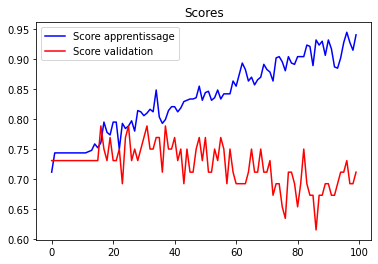

In [ ]:
plot_scores(train)

In [ ]:
y_cnn = model.predict(X_test)

In [ ]:
print(y_cnn)

[[1.9072555e-01 8.0927444e-01]
 [9.9993539e-01 6.4601387e-05]
 [2.1593060e-01 7.8406942e-01]
 [9.8323190e-01 1.6768163e-02]
 [9.8761320e-01 1.2386765e-02]
 [9.6354240e-01 3.6457587e-02]
 [9.6174157e-01 3.8258471e-02]
 [3.0600658e-01 6.9399345e-01]
 [6.8571419e-01 3.1428576e-01]
 [9.0952832e-01 9.0471700e-02]
 [9.9872428e-01 1.2757514e-03]
 [9.9769682e-01 2.3031444e-03]
 [9.1211027e-01 8.7889738e-02]
 [7.3458874e-01 2.6541123e-01]
 [4.4799069e-01 5.5200934e-01]
 [9.9769515e-01 2.3048117e-03]
 [9.5904827e-01 4.0951770e-02]
 [9.8536670e-01 1.4633303e-02]
 [5.6132388e-01 4.3867609e-01]
 [9.1503280e-01 8.4967196e-02]
 [7.9901773e-01 2.0098230e-01]
 [9.3103290e-01 6.8967164e-02]
 [3.5856342e-01 6.4143658e-01]
 [9.9978513e-01 2.1493589e-04]
 [9.3796241e-01 6.2037524e-02]
 [3.5446302e-03 9.9645543e-01]
 [8.6436689e-01 1.3563317e-01]
 [9.9999976e-01 2.2792379e-07]
 [9.4103372e-01 5.8966275e-02]
 [9.9557883e-01 4.4211205e-03]
 [2.5974986e-01 7.4025017e-01]
 [9.9593461e-01 4.0653525e-03]
 [9.8348